In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('sonar.csv')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [98]:
df.shape

(208, 61)

In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [100]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


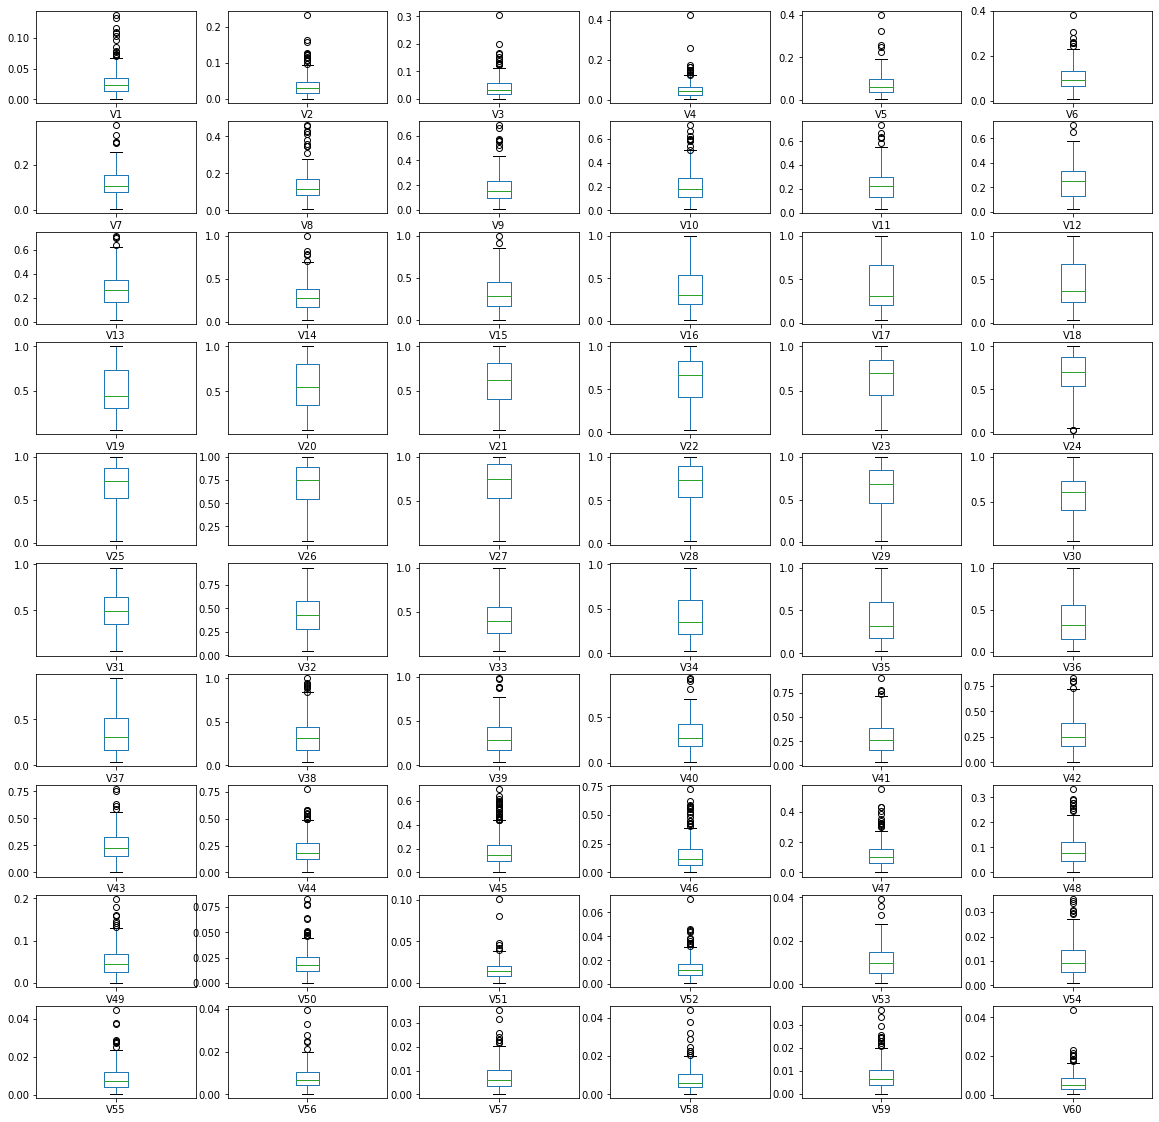

In [101]:
df.plot(kind='box',subplots = True,layout=(10,6),figsize=(20,20))
plt.show()

In [102]:
df.skew()

V1     2.131088
V2     2.155644
V3     2.652518
V4     3.401697
V5     2.018141
V6     1.248166
V7     0.970820
V8     1.481107
V9     1.633870
V10    1.281258
V11    0.987813
V12    0.588681
V13    0.736584
V14    1.022369
V15    0.763964
V16    0.694671
V17    0.654480
V18    0.525845
V19    0.283182
V20   -0.085331
V21   -0.252741
V22   -0.392289
V23   -0.594350
V24   -0.691861
V25   -0.788909
V26   -0.671580
V27   -0.627843
V28   -0.615447
V29   -0.442007
V30   -0.132390
V31    0.259797
V32    0.313420
V33    0.423864
V34    0.563296
V35    0.591654
V36    0.619868
V37    0.676994
V38    1.033366
V39    0.908835
V40    0.861280
V41    0.863526
V42    0.860110
V43    0.909317
V44    1.235086
V45    1.366839
V46    1.706674
V47    1.790155
V48    1.277722
V49    1.273385
V50    1.761714
V51    2.716060
V52    2.093976
V53    1.060572
V54    1.093090
V55    1.789946
V56    1.780805
V57    1.653090
V58    2.098330
V59    1.737506
V60    2.775754
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026655354E48>,
      dtype=object)

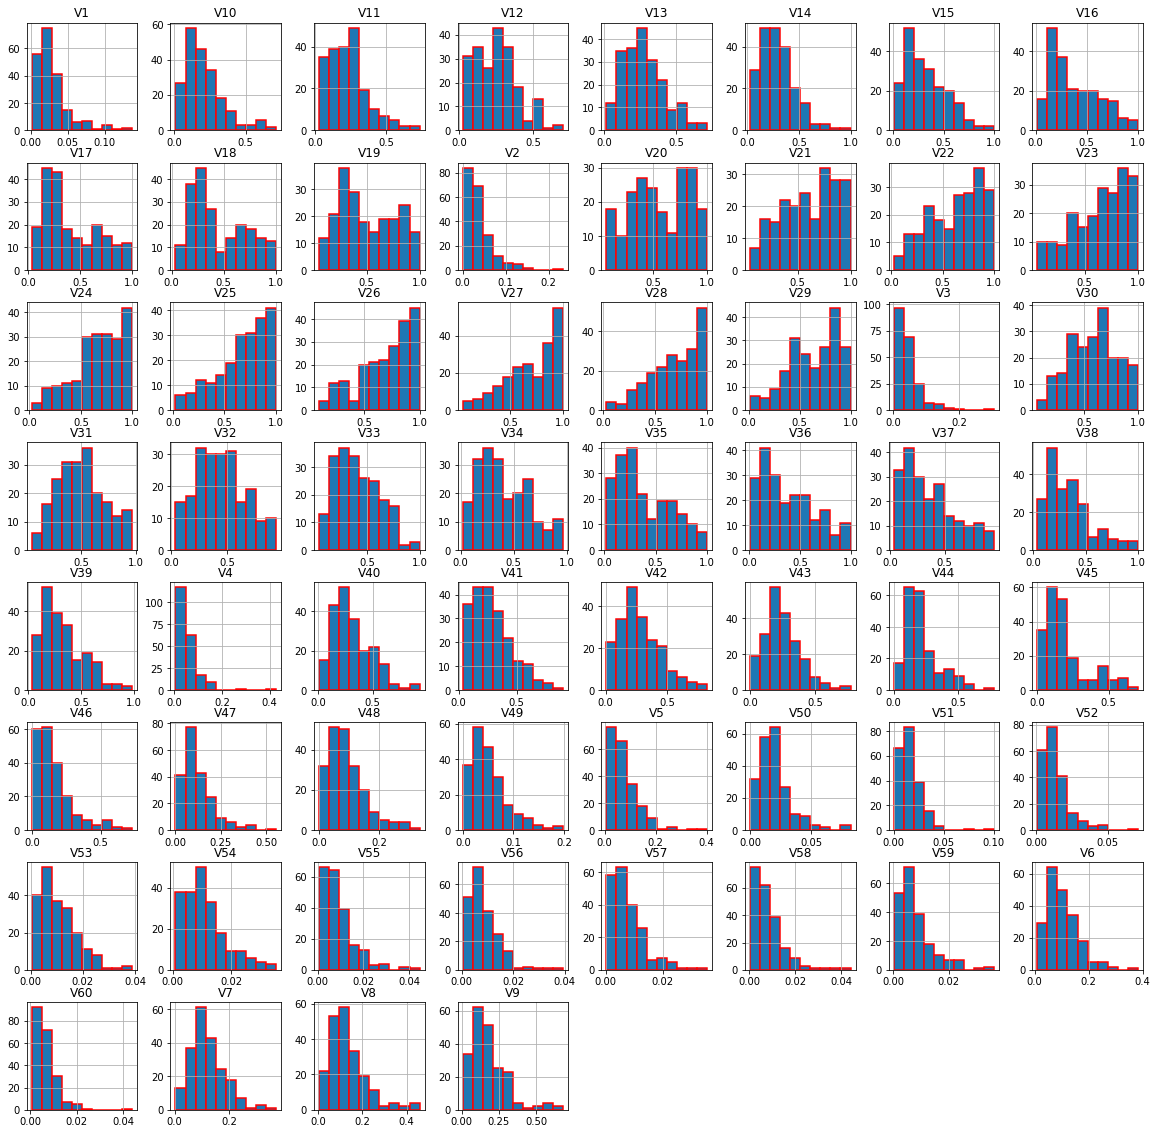

In [103]:
df.hist(edgecolor= 'red',linewidth=1.5,figsize=(20,20))

In [104]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64

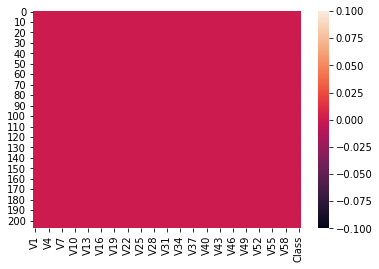

In [105]:
sns.heatmap(df.isnull())

In [106]:
df['class2'] = df['Class'].replace(['Rock','Mine'],[0,1])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V53,V54,V55,V56,V57,V58,V59,V60,Class,class2
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine,1


In [107]:
df.drop(['Class'],axis =1,inplace = True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,class2
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


## Removing the outliers

In [108]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  2,   2,   2,   2,   2,   3,   3,   5,   5,  19,  19,  20,  21,
         22,  22,  22,  22,  22,  22,  22,  22,  33,  44,  44,  44,  65,
         85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,  98,  98,
        101, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 129,
        131, 132, 132, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135,
        135, 136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140,
        140, 140, 141, 141, 142, 142, 142, 143, 143, 143, 144, 145, 145,
        146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147,
        147, 147, 147, 147, 161, 184, 186, 186, 186], dtype=int64),
 array([ 8,  9, 10, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41,
        46, 47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,
         1,  2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12,
        53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,
         8, 51,  9, 10,  2, 47, 51, 45, 46, 

In [109]:
df_new = df[(z<3).all(axis=1)]

In [110]:
df_new.shape

(168, 61)

In [111]:
percentage_loss = (40/208)*100
print(percentage_loss)

19.230769230769234


In [112]:
Q1= df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

V1        0.022200
V2        0.031500
V3        0.039000
V4        0.040125
V5        0.062225
            ...   
V57       0.006725
V58       0.006750
V59       0.006650
V60       0.005425
class2    1.000000
Length: 61, dtype: float64


In [113]:
df_new1=df[~((df<(Q1-1.5*IQR)) |(df>(Q3 +1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(134, 61)


In [114]:
df.shape

(208, 61)

In [115]:
percentage_loss = (74/208)*100
print(percentage_loss)

35.57692307692308


#### since the percentage loss of data is high for IQR method we will take zscore method 

In [116]:
x = df_new.iloc[:,:-1]   #Independent features
y=df_new.iloc[:,-1] 

In [117]:
x.shape

(168, 60)

In [118]:
y.shape

(168,)

In [119]:
type(y)

pandas.core.series.Series

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= .3,random_state = 50) 

In [121]:
x_train.shape

(117, 60)

In [122]:
x_test.shape

(51, 60)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,lr_pred))

accuracy_score: 0.6862745098039216


In [124]:
print(confusion_matrix(y_test,lr_pred))

[[15  9]
 [ 7 20]]


In [125]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.69      0.74      0.71        27

    accuracy                           0.69        51
   macro avg       0.69      0.68      0.68        51
weighted avg       0.69      0.69      0.69        51



In [126]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,nb_pred))

accuracy_score: 0.6470588235294118


In [127]:
print(confusion_matrix(y_test,nb_pred))

[[13 11]
 [ 7 20]]


In [128]:
from sklearn.svm import SVC
svc = SVC(random_state = 50,probability = True)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,svc_pred))

accuracy_score: 0.7254901960784313


In [129]:
print(confusion_matrix(y_test,svc_pred))

[[12 12]
 [ 2 25]]


In [130]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,rf_pred))

accuracy_score: 0.7450980392156863


In [131]:
print(confusion_matrix(y_test,rf_pred))

[[13 11]
 [ 2 25]]


In [132]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,gbc_pred))

accuracy_score: 0.8235294117647058


In [133]:
print(confusion_matrix(y_test,rf_pred))

[[13 11]
 [ 2 25]]


## From the above model GradientBoostingClassifier gives the good and highest accuracy

In [134]:
from sklearn.externals import joblib
joblib.dump(gbc,'sonar_tested.obj')

['sonar_tested.obj']

In [135]:
gbc_from_joblib = joblib.load('sonar_tested.obj')

In [136]:
prex = gbc_from_joblib.predict(x_test)

In [137]:
a = np.array(y_test)
a

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [138]:
df_com = pd.DataFrame({'original':a,'predicted':prex},index = range(len(a)))

###  0 - Rock and 1 - Mines

In [139]:
df_com

,original,predicted
0,0,0
1,0,1
2,1,1
3,1,1
4,1,1
5,0,1
6,1,1
7,0,0
8,0,0
9,1,1
